In [575]:
# Initialize Otter
import otter
grader = otter.Notebook("hw10.ipynb")

# Homework 10: Principal Component Analysis

In lecture we discussed how PCA can be used for dimensionality reduction. Specifically, given a high dimensional dataset, PCA allows us to:
1. Understand the rank of the data. If $k$ principal components capture almost all of the variance, then the data is roughly rank $k$.
2. Create 2D scatterplots of the data. Such plots are a rank 2 representation of our data, and allow us to visually identify clusters of similar observations.

A solid geometric understanding of PCA will help you understand why PCA is able to do these two things. In this homework, we'll build that geometric intuition and look at PCA on two datasets: one where PCA works poorly, and the other where it works pretty well.

## Due Date

This assignment is due **Thursday, November 11th at 11:59 PM PDT**.

**Collaboration Policy**

Data science is a collaborative activity. While you may talk with others about the homework, we ask that you **write your solutions individually**. If you do discuss the assignments with others please **include their names** in the cell below.

**Collaborators:** ...

## Score Breakdown

Question | Points
--- | ---
Question 1a | 1
Question 1b | 1
Question 1c | 1
Question 1d | 1
Question 1e | 1
Question 2a | 2
Question 2b | 1
Question 2c | 1
Question 2d | 3
Question 2e | 2
Question 3a | 1
Question 3b | 1
Question 3c | 1
Question 3d | 2
Question 3e | 2
Question 3f | 2
Question 3g | 1
Question 3h | 2
Question 3i | 2
Total | 28

In [576]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px

# Note: If you're having problems with the 3d scatter plots, uncomment the two lines below, and you should see a version that 
#      number that is at least 4.1.1.
# import plotly
# plotly.__version__

## Question 1: PCA on 3D Data

**In question 1, our goal is to see visually how PCA is simply the process of rotating the coordinate axes of our data.**

The code below reads in a 3D dataset. We have named the DataFrame `surfboard` because the data resembles a surfboard when plotted in 3D space.

In [577]:
surfboard = pd.read_csv("data3d.csv")
surfboard.head(5)

,x,y,z
0,0.005605,2.298191,1.746604
1,-1.093255,2.457522,0.170309
2,0.060946,0.473669,-0.003543
3,-1.761945,2.151108,3.132426
4,1.950637,-0.194469,-2.101949


The cell below will allow you to view the data as a 3D scatterplot. Rotate the data around and zoom in and out using your trackpad or the controls at the top right of the figure.

You should see that the data is an ellipsoid that looks roughly like a surfboard or a [hashbrown patty](https://www.google.com/search?q=hashbrown+patty&source=lnms&tbm=isch). That is, it is pretty long in one direction, pretty wide in another direction, and relatively thin along its third dimension. We can think of these as the "length", "width", and "thickness" of the surfboard data.

Observe that the surfboard is not aligned with the x/y/z axes.

If you get an error that your browser does not support webgl, you may need to restart your kernel and/or browser.

In [578]:
fig = px.scatter_3d(surfboard, x='x', y='y', z='z', range_x = [-10, 10], range_y = [-10, 10], range_z = [-10, 10])
fig.show()

To give the figure a little more visual pop, the following cell does the same plot, but also assigns a pre-determined color value (that we've arbitrarily chosen) to each point. These colors do not mean anything important, they're simply there as a visual aid.

You might find it useful to use `colorize_surfboard_data` later in this assignment.

In [579]:
def colorize_surfboard_data(df):
    colors = pd.read_csv("surfboard_colors.csv", header = None).values
    df_copy = df.copy()
    df_copy.insert(loc = 3, column = "color", value = colors)
    return df_copy
    
fig = px.scatter_3d(colorize_surfboard_data(surfboard), x='x', y='y', z='z', range_x = [-10, 10], range_y = [-10, 10], range_z = [-10, 10], color = "color", color_continuous_scale = 'RdBu')
fig.show()

## Question 1a

Now that we've understood the data, let's work on understanding what PCA will do when applied to this data.

To properly perform PCA, we will first need to "center" the data so that the mean of each feature is 0. 

Compute the columnwise mean of `surfboard` in the cell below, and store the result in `surfboard_mean`. You can choose to make `surfboard_mean` a numpy array or a series, whichever is more convenient for you. Regardless of what data type you use, `surfboard_mean` should have 3 means, 1 for each attribute, with the x coordinate first, then y, then z.

Then, subtract `surfboard_mean` from `surfboard`, and save the result in `surfboard_centered`. The order of the columns in `surfboard_centered` should be x, then y, then z.

<!--
BEGIN QUESTION
name: q1a
points: 1
-->

In [580]:
surfboard_mean = np.mean(surfboard[["x","y","z"]])
surfboard_centered = surfboard[["x","y","z"]] - surfboard_mean

In [581]:
grader.check("q1a")

q1a results: All test cases passed!

## Question 1b

As you may recall from lecture, PCA is a specific application of the singular value decomposition (SVD) for matrices. If we have a data matrix $X$, we can decompose it into $U$, $\Sigma$ and $V^T$ such that $X = U \Sigma V^T$.

In the following cell, use the [`np.linalg.svd`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html) function to compute the SVD of `surfboard_centered`. Store the $U$, $\Sigma$, and $V^T$ matrices in `u`, `s`, and `vt` respectively. This is one line of simple code, exactly like what we saw in lecture.

**Hint:** Set the `full_matrices` argument of `np.linalg.svd` to `False`.

<!--
BEGIN QUESTION
name: q1b
points: 1
-->

In [582]:
u, s, vt = np.linalg.svd(surfboard_centered, full_matrices = False)
u, s, vt

(array([[-0.02551985, -0.02108339, -0.03408865],
        [-0.02103979, -0.0259219 ,  0.05432967],
        [-0.00283413, -0.00809889,  0.00204459],
        ...,
        [ 0.01536972, -0.00483066,  0.05673824],
        [-0.00917593,  0.0345672 ,  0.03491181],
        [-0.01701236,  0.02743128, -0.01966704]]),
 array([103.76854043,  40.38357469,  21.04757518]),
 array([[ 0.38544534, -0.67267377, -0.63161847],
        [-0.5457216 , -0.7181477 ,  0.43180066],
        [-0.74405633,  0.17825229, -0.64389929]]))

In [583]:
grader.check("q1b")

q1b results: All test cases passed!

## Question 1c: Total Variance

Let's now consider the relationship between the singular values `s` and the variance of our data. Recall that the total variance is the sum of the variances of each column of our data. Below, we provide code that computes the variance for each column of the data.

Note: The variances are the same for both `surfboard_centered` and `surfboard`, so we show only one to avoid redundancy.

In [584]:
np.var(surfboard, axis=0)

x    2.330704
y    5.727527
z    4.783513
dtype: float64

The total variance of our dataset is given by the sum of these numbers.

In [585]:
total_variance_computed_from_data = sum(np.var(surfboard, axis=0))
total_variance_computed_from_data

12.841743509780109

As discussed in lecture, the total variance of the data is also equal to the sum of the squares of the singular values divided by the number of data points, that is:

$$Var(X) = \frac{\sum_{i=1}^d{\sigma_i^2}}{N}$$

where $\sigma_i$ is the singular value corresponding to the $i^{th}$ principal component, $N$ is the total number of data points, and $Var(X)$ is the total variance of the data.

In the cell below, compute the total variance using the the formula above and store the result in the variable `total_variance_computed_from_singular_values`. Your result should be very close to `total_variance_computed_from_data`.

<!--
BEGIN QUESTION
name: q1c
points: 1
-->

In [586]:
total_variance_computed_from_singular_values = sum(s**2/surfboard_centered.shape[0])
total_variance_computed_from_singular_values

12.84174350978011

In [587]:
grader.check("q1c")

q1c results: All test cases passed!

## Question 1d: Explained Variance and Scree Plots

In the cell below, set `variance_explained_by_1st_pc` to the proportion of the total variance explained by the 1st principal component. Your answer should be a number between 0 and 1.

Note: This topic was discussed in [this section of the PCA lecture slides](https://docs.google.com/presentation/d/1zpawVI7o2cYA_C_kSQLBjOMrFkSwMDk23JcedzrzttA/edit#slide=id.ge684cfc9d0_2_98).

<!--
BEGIN QUESTION
name: q1d
points: 1
-->

In [588]:
variance_explained_by_1st_pc = (s**2 / sum(s**2))[0]
variance_explained_by_1st_pc

0.8385084140449133

In [589]:
grader.check("q1d")

q1d results: All test cases passed!

We can also create a scree plot that shows the proportion of variance explained by all of our principal components, ordered from most to least. An example scree plot is given below. Note that the variance explained by the first principal component matches the value we calculated above for `variance_explained_by_1st_pc`.

Note: If you're wondering where `len(surfboard_centered)` went, it got canceled out when we divided the variance of a given PC by the total variance.

Text(0.5, 1.0, 'Fraction of Variance Explained by each Principal Component')

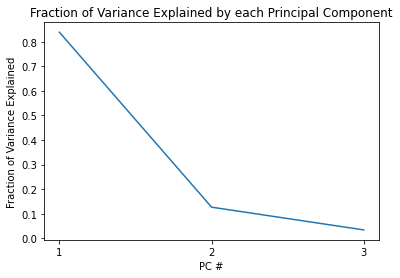

In [590]:
plt.plot([1, 2, 3], s**2 / sum(s**2));
plt.xticks([1, 2, 3], [1, 2, 3]);
plt.xlabel('PC #');
plt.ylabel('Fraction of Variance Explained');
plt.title('Fraction of Variance Explained by each Principal Component')

For this small toy problem, the scree plot is not particularly useful. We'll see why they are useful in practice later in this homework. 

## Question 1e: V as a Rotation Matrix

In lecture, we saw that the first column of $XV$ contained the first principal component values for each observation, the second column of $XV$ contained the second principal component values for each observation, and so forth.

Let's give this matrix a name: $P = XV$ is sometimes known as the "principal component matrix".

Compute the $P$ matrix for the surfboard dataset and store it in the variable `surfboard_pcs`.

<!--
BEGIN QUESTION
name: q1e
points: 1
-->

In [591]:
surfboard_pcs = surfboard_centered @ vt.T

In [592]:
grader.check("q1e")

q1e results: All test cases passed!

## Visualizing the Principal Component Matrix

In some sense, we can think of $P$ as an output of the PCA procedure. 

It is simply a rotation of the data such that the data will now appear "axis aligned". Specifically, for a 3d dataset, if we plot PC1, PC2, and PC3 along the x, y, and z axes of our plot, then the greatest amount of variation happens along the x-axis, the second greatest amount along the y-axis, and the smallest amount along the z-axis. 

To visualize this, run the cell below, which will show our data now projected onto the principal component space. Compare with your original figure, and observe that the data is exactly the same, only it is now rotated.

In [593]:
surfboard_pcs = surfboard_pcs.rename(columns = {0: "pc1", 1: "pc2", 2: "pc3"})
fig = px.scatter_3d(colorize_surfboard_data(surfboard_pcs), 
                    x='pc1', y='pc2', z='pc3', range_x = [-10, 10], range_y = [-10, 10], range_z = [-10, 10], color = 'color', color_continuous_scale = 'RdBu');
fig.show();

We can also create a 2D scatterplot of our surfboard data as well. Note that the resulting is just the 3D plot as viewed from directly "overhead".

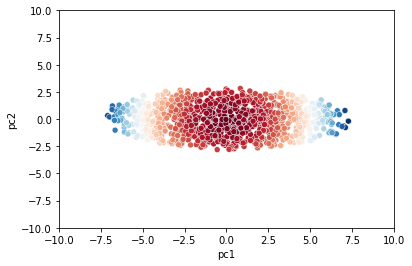

In [594]:
ax = sns.scatterplot(data = colorize_surfboard_data(surfboard_pcs), x = 'pc1', y = 'pc2', hue = "color", palette = "RdBu", legend = False)
ax.set_xlim(-10, 10);
ax.set_ylim(-10, 10);

## Question 1 Summary

Above, we saw that the principal component matrix $P$ is simply the original data rotated in space so that it appears axis-aligned.

Whenever we do a 2D scatter plot of only the first 2 columns of $P$, we are simply looking at the data from "above", i.e. so that the 3rd (or higher) PC is invisible to us.

## Question 2

Let's try out PCA on a higher dimensional dataset. 

In this question, we'll look at a sheet containing Midterm 1 grades from Data 100 in Fall 2019. As it turns out, PCA scatterplots won't be particularly useful on this dataset, but we'll learn some important things along the way.

**Specifically, we'll have 3 primary goals in question 2: we will see what a 2D scatter plot of high dimensional data looks like, we will try to  interpret the meaning of our principal components, and we will see why standardizing columns can be important.**

Note: These grades are a snapshot of the grades before the TAs were done grading. Any problem which hadn't been graded at the time was given a score of 0.

In [595]:
mid1_grades = pd.read_csv("fa19mid1.csv")
mid1_grades.head()

,1.1: 1a (1.0 pts),1.2: 1b (3.0 pts),1.3: 1c i (1.0 pts),1.4: 1c ii (1.0 pts),1.5: 1c iii (1.0 pts),1.6: 1d (6.0 pts),1.7: 1e (8.0 pts),1.8: 1f (2.0 pts),1.9: 1g (2.0 pts),2.1: 2a (2.0 pts),...,5.2: 5a ii (3.0 pts),5.3: 5b i (3.0 pts),5.4: 5b ii (3.0 pts),5.5: 5c (2.0 pts),6.1: 6a i (2.0 pts),6.2: 6a ii (2.0 pts),6.3: 6b i (3.0 pts),6.4: 6b ii (4.0 pts),6.5: 6b iii (3.0 pts),6.6: 6c (4.0 pts)
0,0,3.0,0.5,0,0.5,6,3,2,2,2,...,1,0.0,0,2,1,2,3,1,2,0
1,0,3.0,1.0,0,0.0,6,2,2,0,2,...,0,3.0,3,0,2,2,3,0,2,0
2,1,3.0,1.0,1,1.0,6,7,2,2,2,...,1,2.0,3,2,2,2,3,4,3,0
3,0,2.0,1.0,0,0.5,6,8,2,2,2,...,1,3.0,0,2,1,2,3,1,0,0
4,1,3.0,1.0,1,0.5,6,6,1,0,2,...,3,2.0,3,0,2,2,3,1,2,4


This is 31 dimensional data, with each row of the table representing the scores of a given student. This data has far too many dimensions for us to be able to plot all of the data at once.

One approach is to create a bunch of 2D scatterplots, one for each pair of variables. For example, the cell below generates scatterplots for each of the 5 problems about visualizations.

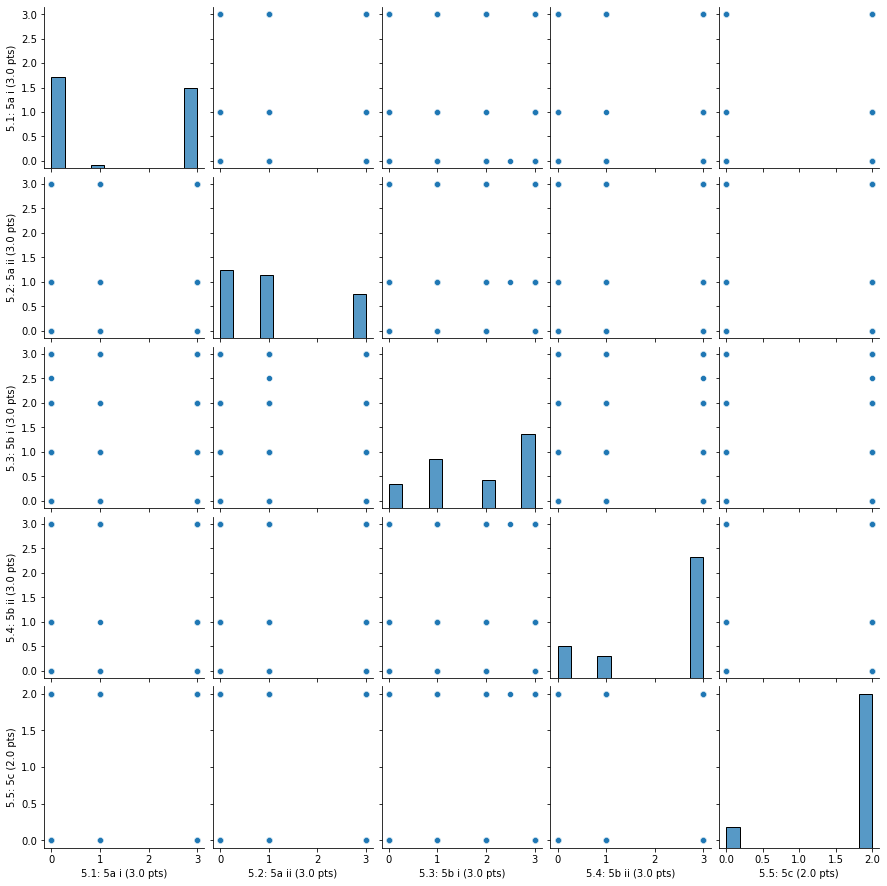

In [596]:
sns.pairplot(mid1_grades.loc[:, '5.1: 5a i (3.0 pts)':'5.5: 5c (2.0 pts)']);

Unfortunately, due to overplotting, the plot above isn't very informative.

To address overplotting, we can add a little bit of noise. The resulting visualization still isn't great, but we can at least learn a few things, e.g. among students who got 1 point on problem 5b.ii, only one of those students also got 1 point on problem 5a.i.

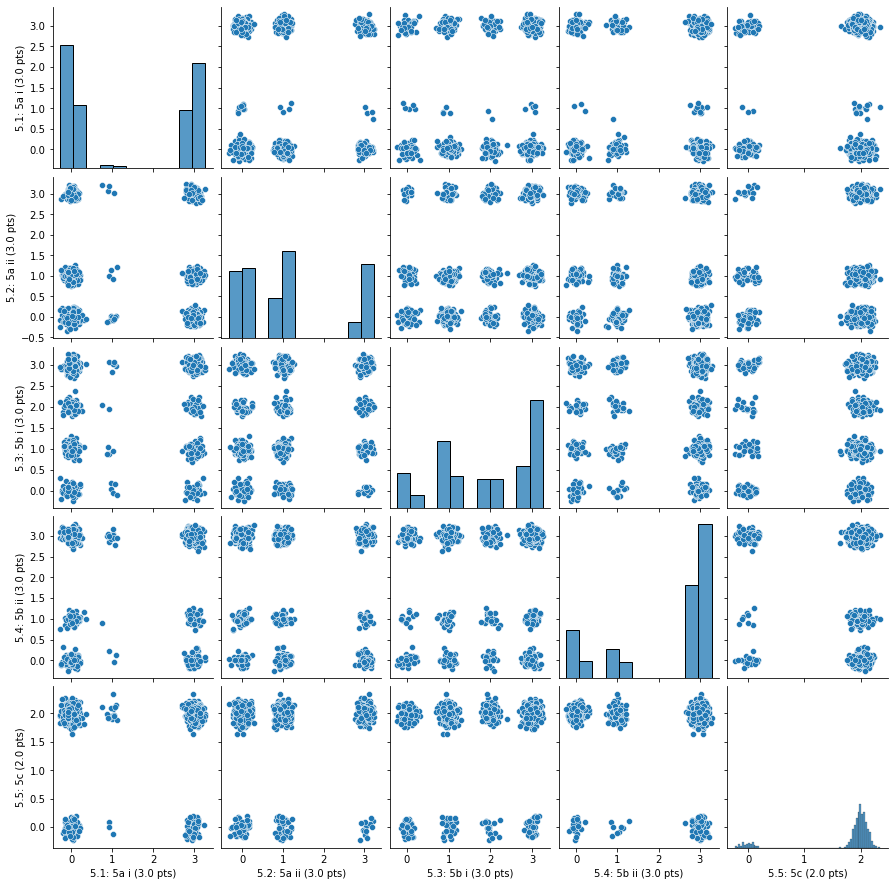

In [597]:
sns.pairplot(mid1_grades.loc[:, '5.1: 5a i (3.0 pts)':'5.5: 5c (2.0 pts)'] + np.random.normal(0, 0.1, size = (len(mid1_grades), 5)));

## Question 2a

Using PCA, we can try to visualize student performance on ALL questions simultaneously. In the cell below, create a **DataFrame** called `mid1_1st_2_pcs` that has 992 rows and 2 columns, where the first column is named `pc1` and represents the first principal component, and the second column is named `pc2` and represents the second principal component. The columns of your dataframe should be named `pc1` and `pc2`.

**Reminder: make sure to center your data first!**

<!--
BEGIN QUESTION
name: q2a
points: 2
-->

In [598]:
mid1_grades_centered = mid1_grades - np.mean(mid1_grades)
u_2a, s_2a, vt_2a = np.linalg.svd(mid1_grades_centered, full_matrices = False)
mid1_1st_2_pcs = (mid1_grades_centered @ vt_2a[:2].T).rename(columns = {0: 'pc1', 1: 'pc2'})

In [599]:
grader.check("q2a")

q2a results: All test cases passed!

## Question 2b

In the cell below, we create a 2d scatterplot of the first two principal components of the data. Observe that the plot appears to have some sort of structure: The data shows diagonal bands. We will not explore the reasons for these diagonal bands, but we leave this as an optional exercise (Q4) at the very end of the homework if you're curious.

As with the surfboard data, we have assigned arbitrary colors to each student as a visual aid. There is no special meaning to the colors.

In [600]:
def colorize_midterm_data(df):
    """Adds a color column to the given midterm data."""
    colors = pd.read_csv("mid1_colors.csv", header = None).values
    df_copy = df.copy()
    df_copy.insert(loc = 0, column = "color", value = colors)
    return df_copy

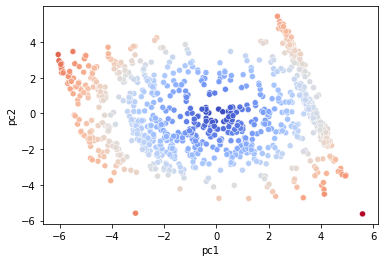

In [601]:
sns.scatterplot(data = colorize_midterm_data(mid1_1st_2_pcs), x = "pc1", y = "pc2", hue = "color", palette = "coolwarm", legend = False);

This is a 2D plot of 31 dimensional data. To get a sense of how much of the story we're capturing, in the cell below, give the proportion of the variance accounted for by the first two principal components. Give your answer exactly. It should be around 39%.

<!--
BEGIN QUESTION
name: q2b
points: 1
-->

In [602]:
ds100_mt1_1st_2_pc_variance_fraction = sum((s_2a**2 / sum(s_2a**2))[:2])
ds100_mt1_1st_2_pc_variance_fraction

0.3903106328937136

In [603]:
grader.check("q2b")

q2b results: All test cases passed!

## Question 2c

While the plot above captures around 39% of the variance, it's hard to interpret. One approach is to do something similar to what we did during lecture where we investigated how much each column of our data contributes to each principal component.

The function defined in the cell below plots and labels the rows of $V^T$.

In [604]:
def plot_pc(col_names, vt, k):
    plt.bar(col_names, vt[k, :], alpha=0.7)
    plt.xticks(col_names, rotation=90);

The cell below plots the first row of $V^T$.

This gives us a chance to try to interpret what PC1 actually means. We see that the first principal component is largely dominated by how a student did on problem 1.7.

Naively, we'd assume that means then that problem 1.7 is the best indicator of student success on the exam. That is, we might expect that 1.7 is a really good problem that deeply tests Data 100 insights.

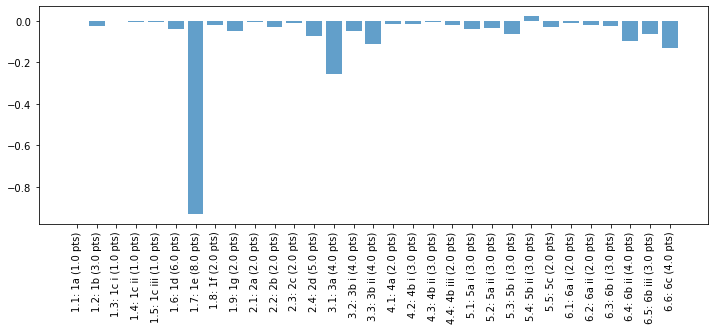

In [605]:
mid1_col_names = mid1_grades.columns

plt.figure(figsize=(12, 4))
plot_pc(mid1_col_names, vt_2a, 0);

However, if we look at the variance of each individual problem, we see that `problem 1.7: 1e` has a much higher variance than the other problems. After all, PCA is all about identifying the combination of features that best captures variance across observations.

And in case you're curious, this large variance is partially because this problem is worth a lot of points, but also because this snapshot of the grades was at a time when we had only graded a small number of the 1.7 submissions so lots of people still have a zero.

In [606]:
np.var(mid1_grades)

1.1: 1a (1.0 pts)        0.246582
1.2: 1b (3.0 pts)        0.321965
1.3: 1c i (1.0 pts)      0.026728
1.4: 1c ii (1.0 pts)     0.080010
1.5: 1c iii (1.0 pts)    0.089778
1.6: 1d (6.0 pts)        1.528688
1.7: 1e (8.0 pts)        8.491249
1.8: 1f (2.0 pts)        0.243952
1.9: 1g (2.0 pts)        0.966340
2.1: 2a (2.0 pts)        0.035961
2.2: 2b (2.0 pts)        0.452519
2.3: 2c (2.0 pts)        0.251915
2.4: 2d (5.0 pts)        1.582213
3.1: 3a (4.0 pts)        2.351464
3.2: 3b i (4.0 pts)      0.710237
3.3: 3b ii (4.0 pts)     1.498929
4.1: 4a (2.0 pts)        0.471467
4.2: 4b i (3.0 pts)      0.735016
4.3: 4b ii (3.0 pts)     0.374919
4.4: 4b iii (2.0 pts)    0.313374
5.1: 5a i (3.0 pts)      2.204308
5.2: 5a ii (3.0 pts)     1.388593
5.3: 5b i (3.0 pts)      1.228950
5.4: 5b ii (3.0 pts)     1.497788
5.5: 5c (2.0 pts)        0.422277
6.1: 6a i (2.0 pts)      0.364395
6.2: 6a ii (2.0 pts)     0.230278
6.3: 6b i (3.0 pts)      0.389746
6.4: 6b ii (4.0 pts)     1.732163
6.5: 6b iii (3

One way to prevent having high variance variables from dominating the first principal component is to rescale our data so that each column has unit variance.

Create a data frame `mid1_grades_centered_scaled` such that the means of each column in `mid1_grades_centered` are 0 and their variances are 1.

*Hint:* Consider how dividing a column by $c$ affects the sample variance of that column. Each column will need to be divided by a different number in order to achieve unit variance in that column.

<!--
BEGIN QUESTION
name: q2c
points: 1
-->

In [607]:
mid1_grades_centered_scaled = (mid1_grades_centered - np.mean(mid1_grades_centered)) / (np.std(mid1_grades_centered))
mid1_grades_centered_scaled

,1.1: 1a (1.0 pts),1.2: 1b (3.0 pts),1.3: 1c i (1.0 pts),1.4: 1c ii (1.0 pts),1.5: 1c iii (1.0 pts),1.6: 1d (6.0 pts),1.7: 1e (8.0 pts),1.8: 1f (2.0 pts),1.9: 1g (2.0 pts),2.1: 2a (2.0 pts),...,5.2: 5a ii (3.0 pts),5.3: 5b i (3.0 pts),5.4: 5b ii (3.0 pts),5.5: 5c (2.0 pts),6.1: 6a i (2.0 pts),6.2: 6a ii (2.0 pts),6.3: 6b i (3.0 pts),6.4: 6b ii (4.0 pts),6.5: 6b iii (3.0 pts),6.6: 6c (4.0 pts)
0,-1.124651,0.421937,-2.802474,-3.225260,-0.203544,0.569910,-0.162592,0.506160,0.830632,0.095685,...,-0.102655,-1.689079,-1.804702,0.369204,-0.911790,0.277291,0.217987,-0.411309,0.067945,-0.694845
1,-1.124651,0.421937,0.255891,-3.225260,-1.872265,0.569910,-0.505766,0.506160,-1.203903,0.095685,...,-0.951274,1.017085,0.646596,-2.708530,0.744795,0.277291,0.217987,-1.171120,0.067945,-0.694845
2,0.889165,0.421937,0.255891,0.310053,1.465178,0.569910,1.210103,0.506160,0.830632,0.095685,...,-0.102655,0.115030,0.646596,0.369204,0.744795,0.277291,0.217987,1.868124,0.991258,-0.694845
3,-1.124651,-1.340428,0.255891,-3.225260,-0.203544,0.569910,1.553277,0.506160,0.830632,0.095685,...,-0.102655,1.017085,-1.804702,0.369204,-0.911790,0.277291,0.217987,-0.411309,-1.778680,-0.694845
4,0.889165,0.421937,0.255891,0.310053,-0.203544,0.569910,0.866929,-1.518481,-1.203903,0.095685,...,1.594582,0.115030,0.646596,-2.708530,0.744795,0.277291,0.217987,-0.411309,0.067945,1.439169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,-1.124651,0.421937,0.255891,0.310053,1.465178,-1.856487,1.553277,0.506160,0.830632,0.095685,...,-0.951274,-0.787024,-1.804702,0.369204,0.744795,0.277291,0.217987,-0.411309,0.991258,-0.694845
988,0.889165,-0.459245,0.255891,0.310053,-0.203544,-1.047688,-0.848940,0.506160,0.830632,0.095685,...,1.594582,-1.689079,0.646596,0.369204,-0.911790,0.277291,0.217987,-0.411309,0.067945,-0.694845
989,0.889165,0.421937,0.255891,0.310053,-0.203544,-0.238889,-0.505766,-1.518481,0.830632,0.095685,...,-0.102655,-0.787024,0.646596,0.369204,0.744795,0.277291,0.217987,-0.411309,0.991258,-0.694845
990,0.889165,0.421937,0.255891,0.310053,1.465178,-1.047688,0.180581,0.506160,0.830632,0.095685,...,-0.102655,0.115030,0.646596,0.369204,-0.911790,0.277291,0.217987,-0.411309,0.067945,1.439169


In [608]:
grader.check("q2c")

q2c results: All test cases passed!

<!-- BEGIN QUESTION -->

## Question 2d

Create a 2D scatterplot of the first two principal components of `mid1_grades_centered_scaled`. Use `colorize_midterm_data` to add a `color` column to `mid1_1st_2_pcs`. Your code will be very similar to the code from problems 2a and 2b. Your result should look like this ![](pca_scatter.png)

<!--
BEGIN QUESTION
name: q2d
manual: true
points: 3
-->

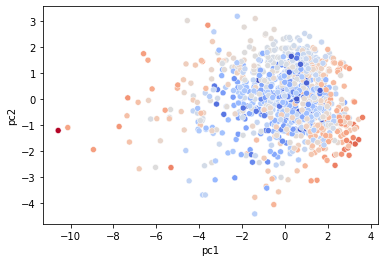

In [609]:
u_2a, s_2a, vt_2a = np.linalg.svd(mid1_grades_centered_scaled, full_matrices = False)
mid1_1st_2_pcs_renamed = (mid1_grades_centered_scaled @ vt_2a[:2].T).rename(columns = {0: 'pc1', 1: 'pc2'})
sns.scatterplot(data = colorize_midterm_data(mid1_1st_2_pcs_renamed), x = "pc1", y = "pc2", hue = "color", palette = "coolwarm", legend = False);

<!-- END QUESTION -->



This scatterplot is quite different. The diagonal banding we saw before is gone.

By looking at the colors, we can also get some sense of how our centering process altered the locations of each student in the 2D PCA scatterplot. Observe that the blue students are still mostly close to each other, and the red points are still largely at the margins. 

This plot shows relatively little structure and has no clusters. There does not appear to be much to learn here.

<!-- BEGIN QUESTION -->

## Question 2e

If you compute the fraction of the variance captured by this 2D scatter plot, you'll see it's only 17%, roughly 12% by the 1st PC, and roughly 5% by the 2nd PC. **In the cell below, create a scree plot showing the fraction of the variance explained by each principal componant using the data from 2d.**

Informally, we can say that our midterm scores matrix has a high rank. More formally, we can say that 2 principal components only capture a small fraction of the variance, and thus the data are not particularly amenable to 2D PCA scatterplotting.

<!--
BEGIN QUESTION
name: q2e
manual: true
points: 2
-->

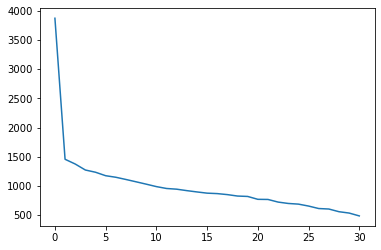

In [610]:
plt.plot(s_2a**2);

<!-- END QUESTION -->



## Question 3

PCA really shines on data where you have reason to believe that the data is relatively low in rank. 

In this final question of the homework, we'll look at how states voted in presidential elections between 1972 and 2016. **Our ultimate goal in question 3 is to show how 2D PCA scatterplots can allow us to identify clusters in a high dimensional dataset.** For this example, that means finding groups of states that vote similarly by plotting their 1st and 2nd principal components.

In [611]:
df = pd.read_csv("presidential_elections.csv")
df.head(5)

,State,1789,1792,1796,1800 †,Unnamed: 5,1804,1808,1812,1816,...,1992,1996,2000 ‡,Unnamed: 60,2004,2008,2012,2016 ‡,2020,State.1
0,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R,R,R,NaN,R,R,R,R,R,Alabama
1,Alaska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R,R,R,NaN,R,R,R,R,R,Alaska
2,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R,D,R,NaN,R,R,R,R,D,Arizona
3,Arkansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,D,D,R,NaN,R,R,R,R,R,Arkansas
4,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,D,D,D,NaN,D,D,D,D,D,California


The data in this table is pretty messy, so let's create a clean version. The clean table should contain exactly 51 rows (corresponding to the 50 states plus Washington DC) and 13 columns (one for each of the election years from 1972 to 2020). The index of this dataframe should be the state name.

Note: In your personal projects, it is sometimes more convenient to manually do your data cleaning using Excel or Google Sheets. The downside of doing this is that you have no record of what you did, and if you have to redownload the data, you have to redo the manual data cleaning process.

In [612]:
df_clean = ( 
        df.iloc[:, -15:]    
        .drop(['Unnamed: 60'], axis = 1) 
        .rename(columns = {"2000 ‡": "2000", "2016 ‡": "2016", "State.1": "State"}) 
        .drop([51]) 
        .set_index("State")
)
df_clean.head(5)

,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016,2020
State,,,,,,,,,,,,,
Alabama,R,D,R,R,R,R,R,R,R,R,R,R,R
Alaska,R,R,R,R,R,R,R,R,R,R,R,R,R
Arizona,R,R,R,R,R,R,D,R,R,R,R,R,D
Arkansas,R,D,R,R,R,D,D,R,R,R,R,R,R
California,R,R,R,R,R,D,D,D,D,D,D,D,D


<!-- BEGIN QUESTION -->

## Question 3a

What does each row in `df_clean` represent?


<!--
BEGIN QUESTION
name: q3a
manual: True
points: 1
-->

Each row represents a state; more specifically each row is a vector/array of how the given state voted over the years in presidential elections.

<!-- END QUESTION -->

## Question 3b

To perform PCA, we need to convert our data into numerical values. To do this, replace all of the "D" characters with the number 0, and all of the "R" characters with the number 1. 

*Hint:* Use `df.replace`.

<!--
BEGIN QUESTION
name: q3b
points: 1
-->

In [613]:
df_numerical = df_clean.replace("D", 0)
df_numerical = df_numerical.replace("R", 1)
df_numerical.head()

,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016,2020
State,,,,,,,,,,,,,
Alabama,1,0,1,1,1,1,1,1,1,1,1,1,1
Alaska,1,1,1,1,1,1,1,1,1,1,1,1,1
Arizona,1,1,1,1,1,1,0,1,1,1,1,1,0
Arkansas,1,0,1,1,1,0,0,1,1,1,1,1,1
California,1,1,1,1,1,0,0,0,0,0,0,0,0


In [614]:
grader.check("q3b")

q3b results: All test cases passed!

## Question 3c

Now center the data so that the mean of each column is 0 and scale the data so that the variance of each column is 1. Store your result in `df_standardized`.

<!--
BEGIN QUESTION
name: q3c
points: 1
-->

In [615]:
df_standardized = (df_numerical - np.mean(df_numerical)) / (np.std(df_numerical))
...

In [616]:
grader.check("q3c")

q3c results: All test cases passed!

## Question 3d

We now have our data in a nice and tidy centered and scaled format, phew. We are now ready to do PCA.

Create a new dataframe `first_2_pcs` that contains exactly the first two columns of the principal components matrix. The first column should be labeled `pc1` and the second column should be labeled `pc2`. Store your result in `first_2_pcs`.

<!--
BEGIN QUESTION
name: q3d
points: 2
-->

In [617]:
u_q3, s_q3, vt_q3 = np.linalg.svd(df_standardized, full_matrices = False)
first_2_pcs = (df_standardized @ vt_q3[:2].T).rename(columns = {0: 'pc1', 1: 'pc2'}).reset_index().drop(columns="State")
first_2_pcs.head()

,pc1,pc2
0,-2.938635,0.796415
1,-3.019941,-0.166841
2,-1.723192,-0.487691
3,-1.698397,0.807836
4,2.376794,-1.807335


In [618]:
grader.check("q3d")

q3d results: All test cases passed!

## Question 3e

The cell below plots the 1st and 2nd principal components of our 50 states + Washington DC.

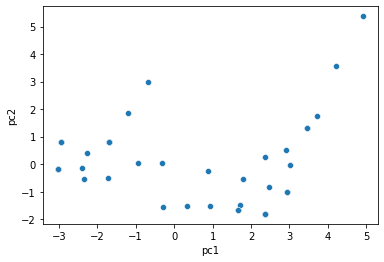

In [619]:
sns.scatterplot(data = first_2_pcs, x = "pc1", y = "pc2");

<!-- BEGIN QUESTION -->

Unfortunately, we have two problems:

1. There is a lot of overplotting, with only 28 distinct dots. This means that at least some states voted exactly alike in these elections.
2. We don't know which state is which because the points are unlabeled.

Let's start by addressing problem 1. 

**In the cell below, create a new dataframe `first_2_pcs_jittered` with a small amount of random noise added to each principal component. In this same cell, create a scatterplot.**

The amount of noise you add should not significantly affect the appearance of the plot, it should simply serve to separate overlapping observations. Don't get caught up on the exact details of your noise generation, it's fine as long as your plot looks roughly the same as the original scatterplot.

*Hint:* See the pairplot from the intro to question 2 for an example of how to introduce noise.

<!--
BEGIN QUESTION
name: q3e
manual: true
points: 2
-->

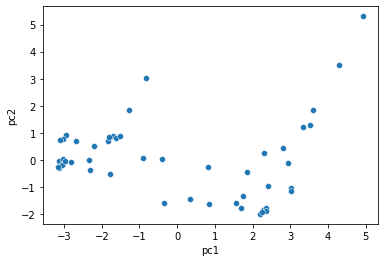

In [620]:
first_2_pcs_jittered = first_2_pcs + np.random.normal(0, 0.1, size = (len(first_2_pcs), 2))
sns.scatterplot(data = first_2_pcs_jittered, x = "pc1", y="pc2");

<!-- END QUESTION -->



## Question 3f

To label our points, the best option is to use the `plotly` library that we used earlier in this homework. `plotly` is an incredibly powerful plotting library that will automatically add axis labels, and will also provide controls so that you can zoom and pan around to look at the data.

One important skill as a user of modern tools is using existing documentation and examples to get the plot you want.

Using the example given on this page as a [guide](https://plot.ly/python/text-and-annotations/), we can create a scatter plot of the **jittered data** from 3e.

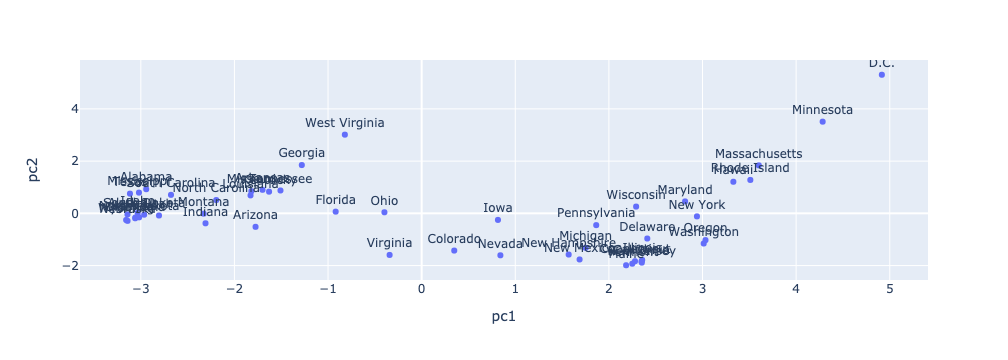

In [621]:
import plotly.express as px

state_names = list(df_standardized.index) 
first_2_pcs_jittered['state'] = state_names 

fig = px.scatter(first_2_pcs_jittered, x="pc1", y="pc2", text="state"); 

fig.update_traces(textposition='top center');

fig.show(); 

### Part i

<!-- BEGIN QUESTION -->

Give an example of a cluster of states that vote a similar way. Does the composition of this cluster surprise you? If you're not familiar with U.S. politics, it's fine to just say 'No, I'm not surprised because I don't know anything about U.S. politics.'.

<!--
BEGIN QUESTION
name: q3fi
manual: true
points: 1
-->

An example of a cluster is Massachusettes, Rhode Island, and Hawaii.  These states are nearly overlapping one another but they also have close neighbors Maryland and New York.  All of these mentioned states certainly sway towards the liberal/democratic side of politics, so the cluster does not surprise me very much because I expect the clusters have hold similar characteristics.

<!-- END QUESTION -->



### Part ii

<!-- BEGIN QUESTION -->

In the cell below, write down anything interesting that you observe by looking at this plot. You will get credit for this as long as you write something reasonable that you can take away from the plot.

<!--
BEGIN QUESTION
name: q3fii
manual: true
points: 1
-->

One observation that stuck out to me is how the data is largely condensed into two main clusters, the first cluster having pc1 values between -2 and -3 and the second primary cluster having most data points fall between pc1 values between positive 2 and 3. This makes sense to me intuitively because we used binary data (1 for republican and 0 for democrat) to conduct our pca analysis.

<!-- END QUESTION -->



## Question 3g

We can also look at the contributions of each year's elections results on the values for our principal components. Below, we use the `plot_pc` function from question 3c to plot the 1st row of $V^T$ in the cell below.

Here by "1st row" we mean the row that is used to generate `pc1`, and by "2nd row" we mean the row that is used to generate `pc2`.

Note: If you want to adjust the size of your plot for a single figure, you can set `plt.figure(figsize=(x, y))` before creating the figure.

**Note: If you get an error when running this cell, make sure you are properly assigning the `vt_q3` variable in Question 3d.**


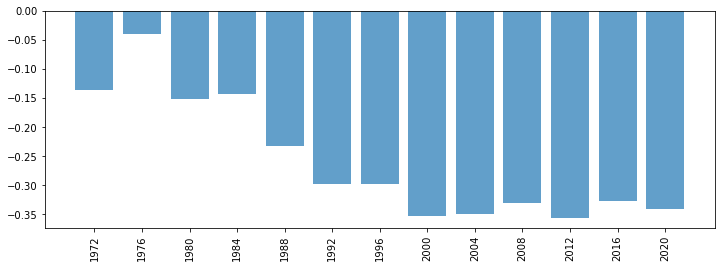

In [622]:
plt.figure(figsize=(12, 4))
plot_pc(list(df_standardized.columns), vt_q3, 0);

<!-- BEGIN QUESTION -->

In the cell below, plot the the 2nd row of $V^T$. 

<!--
BEGIN QUESTION
name: q3g
manual: true
points: 1
-->

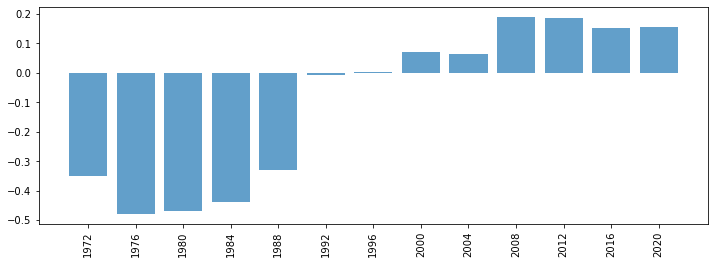

In [623]:
plt.figure(figsize=(12, 4))
plot_pc(list(df_standardized.columns), vt_q3, 1);

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Question 3h

Using your plots from question 3g as well as the original table, give a description of what it means to have a relatively large positive value for `pc1` (right side of the 2D scatter plot), and what it means to have a relatively large positive value for `pc2` (top side of the 2D scatter plot).

In other words, what is generally true about a state with relatively large positive value for `pc1`? For a large positive value for `pc2`?

Note: `pc2` is pretty hard to interpret, and the staff doesn't really have a consensus on what it means either. We'll be nice when grading. 

Note: Principal components beyond the first are often hard to interpret (but not always; see question 1 earlier in this homework).

<!--
BEGIN QUESTION
name: q3h
manual: true
points: 2
-->

PC1 seems to measure how liberal/conservative a given state is in terms of its voting history.  States with relatively large values of PC1 seem to be the more liberal/democratic and in contrast the neagtive pc1 valued data points appear to contain the more conservative leaning states.  Furthermore, swing states such as Ohio and Florida are located around pc1 value of 0.  PC2 is certainly more difficult to intepret but one trend I noticed is that DC is that DC holds the highest valued PC2 and DC is known for being extremely liberal.  Therefore, one possible conclusion is that perhaps PC2 measures how extreme/how consistently a state votes one way or the other.

<!-- END QUESTION -->

In [624]:
# feel free to use this cell for scratch work. If you need more scratch space, add cells *below* this one.

# Make sure to put your actual answer in the cell above where it says "Type your answer here, replacing this text"

<!-- BEGIN QUESTION -->

## Question 3i

To get a better sense of whether our 2D scatterplot captures the whole story, create a scree plot for this data. On the y-axis plot the fraction of the total variance captured by the ith principal component. You should see that the first two principal components capture much more of the variance than we were able to capture when using the Data 100 Midterm 1 data. It is partially for this reason that the 2D scatter plot was so much more useful for this dataset.

*Hint:* Your code will be very similar to the scree plot from problem 1d. Be sure to label your axes appropriately!

<!--
BEGIN QUESTION
name: q3i
manual: true
points: 2
-->

Text(0.5, 1.0, 'Fraction of Variance Explained by each Principal Component')

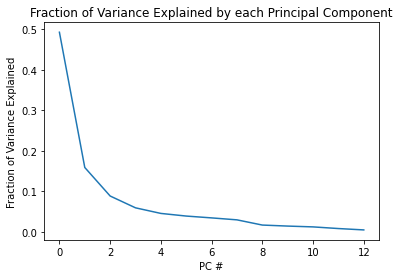

In [625]:
plt.plot(s_q3**2 / sum(s_q3**2));
plt.xlabel('PC #');
plt.ylabel('Fraction of Variance Explained');
plt.title('Fraction of Variance Explained by each Principal Component')

<!-- END QUESTION -->



## Question 4: Interpreting Diagonal Banding (Optional)

As an optional exercise, try to figure out why we saw the diagonal bands in the scatterplot from question 2b. One approach is to use `plot_pc` on the 1st and 2nd pc to understand how they're created from the data. The answer is somewhat lame, but you might find the exercise useful.

_Type your answer here, replacing this text._

In [626]:
### Feel free to use these cells for scratch work


---

To double-check your work, the cell below will rerun all of the autograder tests.

In [627]:
grader.check_all()

q1a results: All test cases passed!

q1b results: All test cases passed!

q1c results: All test cases passed!

q1d results: All test cases passed!

q1e results: All test cases passed!

q2a results: All test cases passed!

q2b results: All test cases passed!

q2c results: All test cases passed!

q3b results: All test cases passed!

q3c results: All test cases passed!

q3d results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [628]:
# Save your notebook first, then run this cell to export your submission.
grader.export()